In [1]:
# Import packages and load the Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
df = pd.read_csv('Training_Data.csv')

In [2]:
#To get a glimpse of headings and number of columns
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [3]:
#To get the number of columns
df.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [4]:
#Distribution details of DataFrame columns
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [5]:
#To get the number of rows and columns
df.shape

(800, 9)

In [6]:
#First remove the duplicate records if any available in the data sheet
df = df.drop_duplicates()

In [7]:
#Post deleting the duplicate check the DF shape once again
df.shape
#observed 5 duplicate rows

(795, 9)

In [8]:
#Observe if any null values found by column
df.isnull().sum()
#Observed No Null Values

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

In [9]:
#To check the class distribution on Target Variable-- In this case there is no need to work on Undersampling or Over sampling
df.zeta_disease.value_counts()

0    517
1    278
Name: zeta_disease, dtype: int64

In [10]:
#Handling 0's (zeros) in the data for few columns like Blood_Pressure for example, which cannot be 0 (Zero)
(df[["age","weight","bmi","blood_pressure","insulin_test","liver_stress_test","cardio_stress_test","years_smoking"]] == 0).sum()

age                     0
weight                  0
bmi                    11
blood_pressure         35
insulin_test          370
liver_stress_test       0
cardio_stress_test    227
years_smoking         114
dtype: int64

In [11]:
# From the above count of Zeros by column replacing 0's with Mean and Median values accordingly
#1.Bmi and Blood Pressure replaced with Mean value(due to less count share)
#2.Insulin_Test,Cardio_Stress_Test,years_smoking replaced with Median value as we have more than 25% of values with zero's and might have outliers.

In [12]:
Mean_Values = round(df[['bmi','blood_pressure']].mean(skipna=True),)
print (Mean_Values)

bmi               32.0
blood_pressure    70.0
dtype: float64


In [13]:
Median_Values = round(df[['insulin_test','cardio_stress_test','years_smoking']].median(skipna=True),)
print (Median_Values)

insulin_test          45.0
cardio_stress_test    53.0
years_smoking          3.0
dtype: float64


In [14]:
#Implementing the Mean and Median values on the Data Frame
df1 = df.replace(0,Mean_Values)

In [15]:
df2 = df1.replace(0,Median_Values)

In [16]:
df = df2

In [17]:
#Now we have new values for Min value and the Mean
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000,795.000000
mean,30.636478,172.376101,32.673333,72.649057,106.849057,0.543723,58.200000,4.486792,0.349686
std,12.861397,31.686964,7.665968,13.193154,113.803821,0.348124,14.093123,3.880879,0.477171
min,18.000000,94.000000,18.200000,24.000000,14.000000,0.140800,37.000000,1.000000,0.000000
25%,21.000000,150.000000,27.550000,64.000000,45.000000,0.307800,53.000000,2.000000,0.000000
50%,26.000000,167.000000,32.200000,72.000000,45.000000,0.444800,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.600000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [18]:
def remove_outliers(df, column_name, *args):
    low = np.quantile(df[column_name], 0.05)
    high = np.quantile(df[column_name], 0.99)
    return df[df[column_name].between(low, high, inclusive=True)] 

In [19]:
# Outlier cleaning implementation
df_new2 = (df.pipe(remove_outliers,'age','weight','bmi','blood_pressure','insulin_test','liver_stress_test','cardio_stress_test','years_smoking'))

In [20]:
df_new2.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,30.111675,172.445431,32.720685,72.634518,107.200508,0.543029,58.237310,4.489848,0.350254
std,11.539456,31.698882,7.672735,13.241801,114.190273,0.347677,14.142343,3.880836,0.477352
min,18.000000,94.000000,18.200000,24.000000,14.000000,0.140800,37.000000,1.000000,0.000000
25%,21.000000,150.000000,27.600000,64.000000,45.000000,0.307800,53.000000,2.000000,0.000000
50%,26.000000,167.000000,32.300000,72.000000,45.000000,0.444300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.600000,80.000000,130.500000,0.699800,62.000000,6.000000,1.000000
max,66.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [21]:
df = df_new2

In [22]:
correlation  = df.corr()
correlation

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,0.239218,0.077393,0.277942,0.005727,0.033627,0.051802,0.439022,0.250324
weight,0.239218,1.000000,0.208008,0.159659,0.330176,0.139586,0.153952,0.105470,0.473280
bmi,0.077393,0.208008,1.000000,0.210615,0.206515,0.124604,0.326886,0.062179,0.278855
blood_pressure,0.277942,0.159659,0.210615,1.000000,-0.021587,0.005409,0.104520,0.133720,0.119380
insulin_test,0.005727,0.330176,0.206515,-0.021587,1.000000,0.159318,0.157855,0.014668,0.145451
liver_stress_test,0.033627,0.139586,0.124604,0.005409,0.159318,1.000000,0.100605,0.026634,0.179569
cardio_stress_test,0.051802,0.153952,0.326886,0.104520,0.157855,0.100605,1.000000,-0.017053,0.164787
years_smoking,0.439022,0.105470,0.062179,0.133720,0.014668,0.026634,-0.017053,1.000000,0.200833
zeta_disease,0.250324,0.473280,0.278855,0.119380,0.145451,0.179569,0.164787,0.200833,1.000000


<AxesSubplot:>

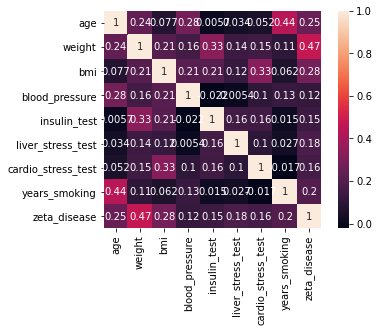

In [23]:
#Find correlation between the numerical variables
sns.heatmap(df.corr(), annot = True,square=True)
#Most of the values are medium correlated with each other 

In [24]:
columns_list = list(df.columns)
print(columns_list)

['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking', 'zeta_disease']


In [25]:
Independent_Features = list(set(columns_list)-set(['zeta_disease']))
print(Independent_Features)

['years_smoking', 'liver_stress_test', 'bmi', 'cardio_stress_test', 'weight', 'blood_pressure', 'insulin_test', 'age']


In [26]:
#Independent Variable
x= df[Independent_Features].values

In [27]:
#Target Variable
y=df['zeta_disease'].values

In [28]:
#Rescaling the data or Feature scaling for better results
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)
x

array([[-0.53846154, -0.1839545 , -0.73784978, ..., -0.15789474,
        -0.94167451,  0.5       ],
       [-0.94871795, -0.85271666, -0.40206186, ..., -0.33834586,
        -0.89275635, -0.79166667],
       [-0.69230769, -0.92096991, -0.65537555, ..., -0.0075188 ,
        -0.94167451,  0.20833333],
       ...,
       [-0.74358974, -0.90001497, -0.54344624, ..., -0.45864662,
        -0.94167451, -0.20833333],
       [-0.79487179, -0.92635833, -0.7820324 , ..., -0.2481203 ,
        -0.94167451, -0.625     ],
       [-1.        , -0.70902559, -0.66126657, ..., -0.51879699,
        -0.94167451, -0.66666667]])

In [29]:
#Split the dataset
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size,random_state=seed)

In [30]:
# fit model on training data
model = XGBClassifier()
model.fit(x_train, y_train)

[13:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91829\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# Run model on test data
predictions = model.predict(x_test)

In [32]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.01%


In [33]:
print(confusion_matrix(y_test, predictions))

[[144  36]
 [ 24  57]]


In [34]:
#Now validate the model prediction on the new Prediction dataset.
New_Df=pd.read_csv('Prediction_Data.csv')

In [35]:
New_Df.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [36]:
input_feature=New_Df.loc[:,New_Df.columns!='zeta_disease'].values
target_feature=New_Df.loc[:,'zeta_disease'].values

In [37]:
predict = model.predict(input_feature)

In [38]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [39]:
#Conclusion : The model has predicted that all the patients in the prediction Dataset could get Disease.